# Section A: An Intro to Machine Learning and NLP

<img src="pic7.png" width="700">

https://www.javatpoint.com/machine-learning

## Supervised Machine Learning

<img src="pic1.png" width="800">

https://karthikvegeta.medium.com/welcome-to-the-hood-of-machine-learning-199dd31f39e6

## Classification vs. Regression: Weather Forecasting

<img src="pic2.jpeg" width="700">

https://medium.com/@ali_88273/regression-vs-classification-87c224350d69

## Text Classification

▪ Logistic Regression

▪ Naive Bayes

▪ Comparing Methods: Classification Metrics

## How Does Logistic Regression Work?

▪ A binary classification task: To predict whether an animal is a cat or not.

<img src="pic8.png" width="600">

https://towardsdatascience.com/analytics-building-blocks-binary-classification-d205890314fc

![](https://i163.photobucket.com/albums/t281/kyin_album/m6.png)

## Fruits Classifier?

▪ A multiclass classification task: To predict whether a fruit is an apple, orange or grapes.

![](https://i163.photobucket.com/albums/t281/kyin_album/m1_1.png)

# Section B: Classification with Logistic Regression

## Classification Task: Detection of spam emails

<img src="pic4.png" width="500">

https://developers.google.com/machine-learning/guides/text-classification

## Step 1: Preparing Data 

▪ Make sure the data in **spam.txt** is labeled data.

### Loading Data into a DataFrame

In [2]:
import pandas as pd

data = pd.read_table('spam.txt', encoding = 'windows-1252', header = None)
data

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Adding New Labels to Data

In [3]:
data.columns = ['label', 'text']
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Warm Up Exercise

▪ **Question**: Swapping the "label" and "text" columns

In [4]:
df_2 = data.reindex(columns = ['text', 'label'])
df_2

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


## Walk-through Examples Before Data Preprocessing

### Example 1A: Normal Function

In [5]:
# Create a normal function that identifies an even number
def even(num):
    return num % 2 == 0

nums = [5, 10]

print(nums[0], "is even:", even(nums[0]))
print(nums[1], "is even:", even(nums[1]))

5 is even: False
10 is even: True


In [6]:
print(type(even))

<class 'function'>


### Python Lambda

▪ Python lambda functions are **small, anonymous functions** defined using the **lambda** keyword.

<img src="pic9.png" width="450">

https://www.scaler.com/topics/how-to-use-lambda-functions-in-python/

### Example 1B: Lambda Function

In [7]:
# Create a lambda function that identifies an even number
result = lambda num: num % 2 == 0

nums = [5, 10]

print(nums[0], "is even:", result(nums[0]))
print(nums[1], "is even:", result(nums[1]))

5 is even: False
10 is even: True


In [8]:
print(type(result))

<class 'function'>


### Warm Up Exercise

▪ **Question**: Create and use a lambda function that multiplies two numbers.

In [9]:
# Code?
multiply = lambda num1,num2: num1 * num2
print(multiply(2,5))

10


### Invoking Functions with and without Parentheses

▪ When we call a function with parentheses, the function gets execute and returns the result to the callable.

▪ When we call a function without parentheses, a function reference is sent to the callable rather than executing the function itself.

https://www.geeksforgeeks.org/python-invoking-functions-with-and-without-parentheses/

### Example 1

In [10]:
def func_A(num = 5):
    print("Function A")

def func_B(num = 10):
    print("Function B")

In [11]:
func_B(func_A())

Function A
Function B


In [13]:
func_B(func_A)
#just passing reference

Function B


### Example 2

In [14]:
import re

text = "I love AVENGER movies, especially The Endgame."

def lowercase(match_obj):
    return match_obj.group(0).lower()

clean_text = re.sub(r"\b[A-Z]+\b", lowercase, text)
clean_text

'i love avenger movies, especially The Endgame.'

### Pandas Series map()

▪ The map() function is used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.

https://www.w3resource.com/pandas/series/series-map.php

## Step 2: Preprocessing Data 

In [15]:
# Before preprocessing data... 
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
import re
import string

# Remove numbers
x_number = lambda x: re.sub(r"\w*\d\w*", '', x)

# Remove punctuation and capital letters
x_punc_upper = lambda x: re.sub('[%s]' %(string.punctuation), '', x.lower())

In [17]:
data['text'] = data.text.map(x_number).map(x_punc_upper)

# After preprocessing data...
data.head()

,label,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


## Step 3: Splitting Data into Input and Output

▪ **Input**: Features, Predictors, Independent Variables, X's 
    
▪ **Output**: Label, Outcome, Dependent Variable, Y
    
![](https://i163.photobucket.com/albums/t281/kyin_album/m2.png)

In [18]:
# Inputs to be fed into the model
X = data.text

# Output of the model
y = data.label 

In [19]:
X.head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in  a wkly comp to win fa cup final...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: text, dtype: object

In [20]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

### Overfitting

▪ Overfitting refers to a model that models the training data too well.

![](pic5.png)

overfit = cannot generalise

https://www.ibm.com/cloud/learn/overfitting

### How to Avoid Overfitting?

![](https://i163.photobucket.com/albums/t281/kyin_album/m4.png)

## Step 4: Splitting Data into Training Data and Test Data

### train_test_split()

▪ X: independent variable(s)

▪ y: dependent variable

▪ test size = 30% of observations, which means training size = 70% of observations

▪ random state = 42, so we all get the same random train / test split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#random_state = seed of the splited data (fixed/same split train & test datasets)

![](pic6.png)

In [25]:
X_train.shape

(3900,)

In [26]:
X_train.head()

708             quite late lar ard  anyway i wun b drivin
4338                         on a tuesday night r u  real
5029    go chase after her and run her over while shes...
4921       g says you never answer your texts confirmdeny
2592            still work going onit is very small house
Name: text, dtype: object

In [27]:
y_train.shape

(3900,)

In [28]:
y_train.head()

708     ham
4338    ham
5029    ham
4921    ham
2592    ham
Name: label, dtype: object

In [29]:
X_test.shape

(1672,)

In [30]:
y_test.shape

(1672,)

## Step 5: Numerically Encoding the Input Data

![](pic10.png)

https://www.educative.io/answers/countvectorizer-in-python

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
#can use tfidx vectorizer, better

cv = CountVectorizer(stop_words = 'english')

X_train_cv = cv.fit_transform(X_train).toarray()

print(X_train_cv.shape)

#6644 unique words after we remove the stop_words

(3900, 6644)


In [34]:
print(X_train_cv)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
# Transform test data using the same vocabularies
X_test_cv = cv.transform(X_test).toarray() 

print(X_test_cv.shape)

(1672, 6644)


## Step 6: Fitting The Model and Predicting Outcomes

In [36]:
# Use a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Train the model
lr.fit(X_train_cv, y_train)

LogisticRegression()

In [37]:
# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred_cv = lr.predict(X_test_cv)

# The output is all of the predictions/ labels
y_pred_cv 

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

## Step 7: Evaluating The Model

![](https://i163.photobucket.com/albums/t281/kyin_album/m5.png)

positive = spam, negative = not spam
true = correct result, false = incorrect result

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_cv)
cm

array([[1448,    0],
       [  28,  196]], dtype=int64)

<AxesSubplot:>

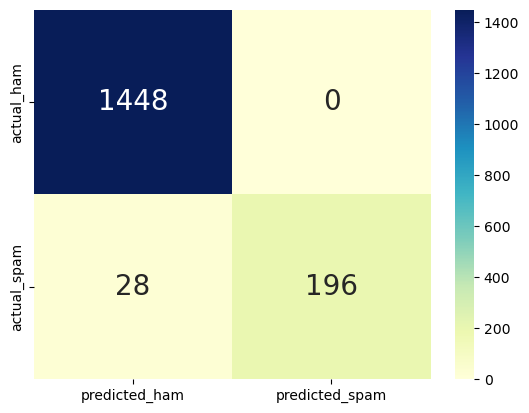

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'], 
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

In [40]:
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg), 3)
precision = round((true_pos) / (true_pos + false_pos), 3)
recall = round((true_pos) / (true_pos + false_neg), 3)
f1 = round(2 * (precision * recall) / (precision + recall), 3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

Accuracy: 0.983
Precision: 1.0
Recall: 0.875
F1 Score: 0.933


# Section C: Classification with Naive Bayes

## Training the Model

In [41]:
# Use a Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes prediction model object
nb = MultinomialNB()

# Train the model
nb.fit(X_train_cv, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred_cv_nb = nb.predict(X_test_cv)

# The output is all of the predictions
y_pred_cv_nb 

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

## Evaluating the Model

Accuracy: 0.985
Precision: 0.95
Recall: 0.938
F1 Score: 0.944


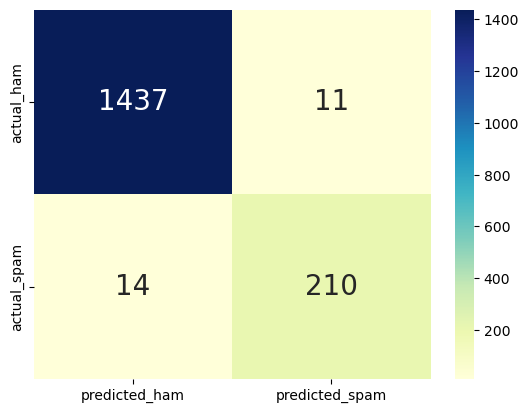

In [43]:
cm = confusion_matrix(y_test, y_pred_cv_nb)

sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg), 3)
precision = round((true_pos) / (true_pos + false_pos), 3)
recall = round((true_pos) / (true_pos + false_neg), 3)
f1 = round(2 * (precision * recall) / (precision + recall), 3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

#naive bayes is better bcz the f1 score, which is the accuracy, precision, and recall are higher.

# Section D: NLP Showcase

## Name Gender Classifier

▪ To create a classifier that would automatically classify a given name into either male or female.

In [102]:
from nltk.corpus import names

male_names = names.words("male.txt")
female_names = names.words("female.txt")

In [103]:
f = open("m.txt", "r")
male_names = f.read().splitlines()
print(male_names[:10])

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim']


In [104]:
f = open("f.txt", "r")
female_names = f.read().splitlines()
print(female_names[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [105]:
names_list = [(name, 'male') for name in male_names]
names_list += [(name, 'female') for name in female_names]

print(names_list[:10])

[('Aamir', 'male'), ('Aaron', 'male'), ('Abbey', 'male'), ('Abbie', 'male'), ('Abbot', 'male'), ('Abbott', 'male'), ('Abby', 'male'), ('Abdel', 'male'), ('Abdul', 'male'), ('Abdulkarim', 'male')]


In [106]:
import random

random.shuffle(names_list)

In [107]:
def extract_gender_features(name):
    
    # Convert all names to lowercase
    name = name.lower()
    
    # Create an empty dictionary
    features = {}
    
    # Extract different lengths of suffixes from names as features
    features["suffix1"] = name[-1:]
    features["suffix2"] = name[-2:] if len(name) > 1 else name[0]
    features["suffix3"] = name[-3:] if len(name) > 2 else name[0]
    features["suffix4"] = name[-4:] if len(name) > 3 else name[0]
    features["suffix5"] = name[-5:] if len(name) > 4 else name[0]
    features["suffix6"] = name[-6:] if len(name) > 5 else name[0]
    
    # Extract different lengths of prefixes from names as features
    features["prefix1"] = name[:1]
    features["prefix2"] = name[:2] if len(name) > 1 else name[0]
    features["prefix3"] = name[:3] if len(name) > 2 else name[0]
    features["prefix4"] = name[:4] if len(name) > 3 else name[0]
    features["prefix5"] = name[:5] if len(name) > 4 else name[0]
    features["wordLen"] = len(name)
   
    return features

data = [(extract_gender_features(name), gender) for (name, gender) in names_list]

In [108]:
# Set a limit for splitting training and testing data
train_count = int(.8 * len(data))
train_count

6355

In [109]:
print(names_list[8])
print(data[8])

('Bailie', 'male')
({'suffix1': 'e', 'suffix2': 'ie', 'suffix3': 'lie', 'suffix4': 'ilie', 'suffix5': 'ailie', 'suffix6': 'bailie', 'prefix1': 'b', 'prefix2': 'ba', 'prefix3': 'bai', 'prefix4': 'bail', 'prefix5': 'baili', 'wordLen': 6}, 'male')


In [110]:
# Make the first 80% (the value of trainCount) dataset as the training data
train_data = data[:train_count]

# Make the remaining dataset as the test data
test_data = data[train_count:]

In [111]:
import nltk

# Train Naive Bayes classifier
bayes = nltk.NaiveBayesClassifier.train(train_data)

In [112]:
# Test the classifier
# Code?
output_1 = bayes.classify(extract_gender_features("Neo"))
output_2 = bayes.classify(extract_gender_features("Jessie"))
output_3 = bayes.classify(extract_gender_features("Jessy"))
output_1, output_2, output_3

('male', 'female', 'female')

In [113]:
# Use classify() to do gender prediction
prediction = [(bayes.classify(features), bayes.classify(features) == label) for features, label in test_data]

In [114]:
names_test = names_list[train_count:]

# Create an empty list to store name, gender, prediction, true/false
result = []

# Use sum() to combine two tuples into a new tuple
for index in range(len(prediction)):
    result.append(sum((names_test[index], prediction[index]), ()))

In [115]:
import pandas as pd

df = pd.DataFrame(result, columns = ['Name', 'Gender', 'Prediction', 'T/F'])
df[:20]

,Name,Gender,Prediction,T/F
0,Shelden,male,male,True
1,Dory,male,female,False
2,Amory,male,male,True
3,Tyrone,male,male,True
4,Sebastian,male,male,True
5,Debbra,female,female,True
6,Agamemnon,male,male,True
7,Xena,female,female,True
8,Analiese,female,female,True
9,Cherie,female,female,True


In [116]:
# Evaluate the performance in terms of accuracy
print("Test data accuracy =", nltk.classify.accuracy(bayes, test_data))

Test data accuracy = 0.8376337319068596


In [117]:
# Show the 25 most informative features that our model used
bayes.show_most_informative_features(25)

Most Informative Features
                 suffix2 = 'na'           female : male   =     85.0 : 1.0
                 suffix2 = 'la'           female : male   =     64.4 : 1.0
                 suffix2 = 'ia'           female : male   =     46.7 : 1.0
                 suffix1 = 'k'              male : female =     36.2 : 1.0
                 suffix1 = 'a'            female : male   =     31.5 : 1.0
                 suffix2 = 'rd'             male : female =     29.1 : 1.0
                 suffix2 = 'do'             male : female =     24.5 : 1.0
                 suffix2 = 'us'             male : female =     24.0 : 1.0
                 suffix1 = 'f'              male : female =     23.8 : 1.0
                 suffix3 = 'ana'          female : male   =     22.5 : 1.0
                 suffix2 = 'ra'           female : male   =     22.5 : 1.0
                 suffix2 = 'ta'           female : male   =     22.1 : 1.0
                 suffix2 = 'ld'             male : female =     20.6 : 1.0

In [118]:
# Show all incorrect predictions
errors = []

for (name, label) in names_list:
    if bayes.classify(extract_gender_features(name)) != label:
        errors.append({"name": name, "label": label})

errors[0:20]

[{'name': 'Heather', 'label': 'female'},
 {'name': 'Daffy', 'label': 'male'},
 {'name': 'Raf', 'label': 'female'},
 {'name': 'Cary', 'label': 'male'},
 {'name': 'Jan', 'label': 'female'},
 {'name': 'Jermaine', 'label': 'male'},
 {'name': 'Bert', 'label': 'female'},
 {'name': 'Tammy', 'label': 'male'},
 {'name': 'Krishna', 'label': 'male'},
 {'name': 'Jesse', 'label': 'male'},
 {'name': 'Angie', 'label': 'male'},
 {'name': 'Rene', 'label': 'male'},
 {'name': 'Gerry', 'label': 'female'},
 {'name': 'Marigold', 'label': 'female'},
 {'name': 'Ajay', 'label': 'female'},
 {'name': 'Demetris', 'label': 'female'},
 {'name': 'Valentine', 'label': 'male'},
 {'name': 'Lindsey', 'label': 'male'},
 {'name': 'Harriot', 'label': 'female'},
 {'name': 'Kris', 'label': 'male'}]

# Section E: Machine Learning and NLP Exercises

## Question 1

### Instructions

▪ We will be using a review dataset from Kaggle (e.g., coffee.csv) for this exercise. 

▪ The product we'll be focusing on this time is a cappuccino cup.

▪ Later on, split your dataset based on the ratio of 80% training data + 20% testing data.

### Step 1: Preparing Data 

### Step 2: Preprocessing Data 

### Step 3: Splitting Data into Input and Output

### Step 4: Splitting Data into Training Data and Test Data

### Step 5: Numerically Encoding the Input Data

### Step 6: Fitting Different Models and Predicting Outcomes

### I. Logistic Regression

###  II. Naive Bayes

### III. SVM

### IV. Decision Tree

### V. Random Forest

### VI. KNN

### Step 7: Evaluating Predictive Models

**Example Output**:

Accuracy score for LR  = 0.1651<br>
Accuracy score for NB  = 0.6514<br>
Accuracy score for SVM = 0.5413<br>
Accuracy score for DT  = 0.5505<br>
Accuracy score for RF  = 0.5872<br>
Accuracy score for KNN = 0.5963<br>
Accuracy score for NB  = 0.6514

## Question 2

Predict the rate of this review: **"I dislike this coffee, terrible taste and very greasy."** by using Linear Regression, SVM, Decision Tree, Random Forest, KNN, and Naive Bayes